### Notebook 2_5

## Steady State Sine Response — Bode

#### Student Learning Outcomes
* Learn the concept of Bode plot.
* Learn how to plot Bode using Scipy
* Learn how to interpret DC gain on bode
--------------------

In [1]:
# import at first
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 1: H(jw) with different w</h2>
</div>


Again, recall:

**For a sine input:**
$$x(t)=A\sin(\omega t)$$

**Goes into a any order system:**
$$H(s)$$

The **steady state of the output** as:
$$y(t) =A \times |H(j\omega)| \sin(\omega t+ \angle (H(j\omega))) $$

------

The effects of passing thru a system are:

* Amplitude multiplied by $|H(j\omega)|$
* Phase Shift to left by $\angle (H(j\omega))$
* Frequency $\omega$ un-changed

----------

In this class, we will take a **System-centered View** and study such **system's effect on input**.

Conside such system:
$$H(s) = \frac{30}{s+5}$$

Use Python code to calculate the $|H(j\omega)|$ and $\angle (H(j\omega))$ for the following sine input, respectively. Use Degrees for all phase shift.
* $$x_1(t) = \sin(t)$$
* $$x_2(t) = \sin(2t)$$
* $$x_3(t) = \sin(3t)$$

In [6]:
# Here is for your code
jw = np.array([1j, 2j, 3j])
H_jw = 30/(jw + 5)
print("Mag: ", np.abs(H_jw))
# print(np.angle(H_jw))
# use degree for phasor
print("Angle: ", np.angle(H_jw, deg=True))

Mag:  [5.88348405 5.57086015 5.14495755]
Angle:  [-11.30993247 -21.80140949 -30.96375653]


**Answer**
* $5.88\angle -11.3 deg$
* $5.57\angle -21.8 deg$
* $5.14\angle -31.0 deg$

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Python result: 1 pt</strong>
</span>

---------

As you can see, when the sine signal alters at 3 different freqs, the same system shows 3 different effects.

Now, let's test more.

- Use Python code to calculate the $|H(j\omega)|$ and $\angle (H(j\omega))$ for sine inputs at 100 different freqs: $$x_i(t) = \sin(\omega_i t)$$ 
where $\omega_i = 1, 2, 3, 4, \dots, 98, 99, 100$
- Use Degrees for all phase shift.
- Convert all $\omega$ (rad/s) into $f$ (Hz). Because Hz is more commonly used in measuring instruments.
- Plot all 100 $|H(j\omega)|$ versus $f$ in a figure. ($|H(j\omega)|$ as Y-axis, $f$ as X-axis)
- Plot all 100 $\angle (H(j\omega))$ versus $f$ in another figure. ($|H(j\omega)|$ as Y-axis, $f$ as X-axis)
- Dont forget to label your Axes

<div style="border-left: 4px solid #008080; padding: 10px; background-color: #E5FFFF;">
<strong>[Note: ]</strong> Hand code it. Not with ChatGPT. Useful functions can be np.range, np.linspace
</div>

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Python plots: 1 pt</strong>
</span>

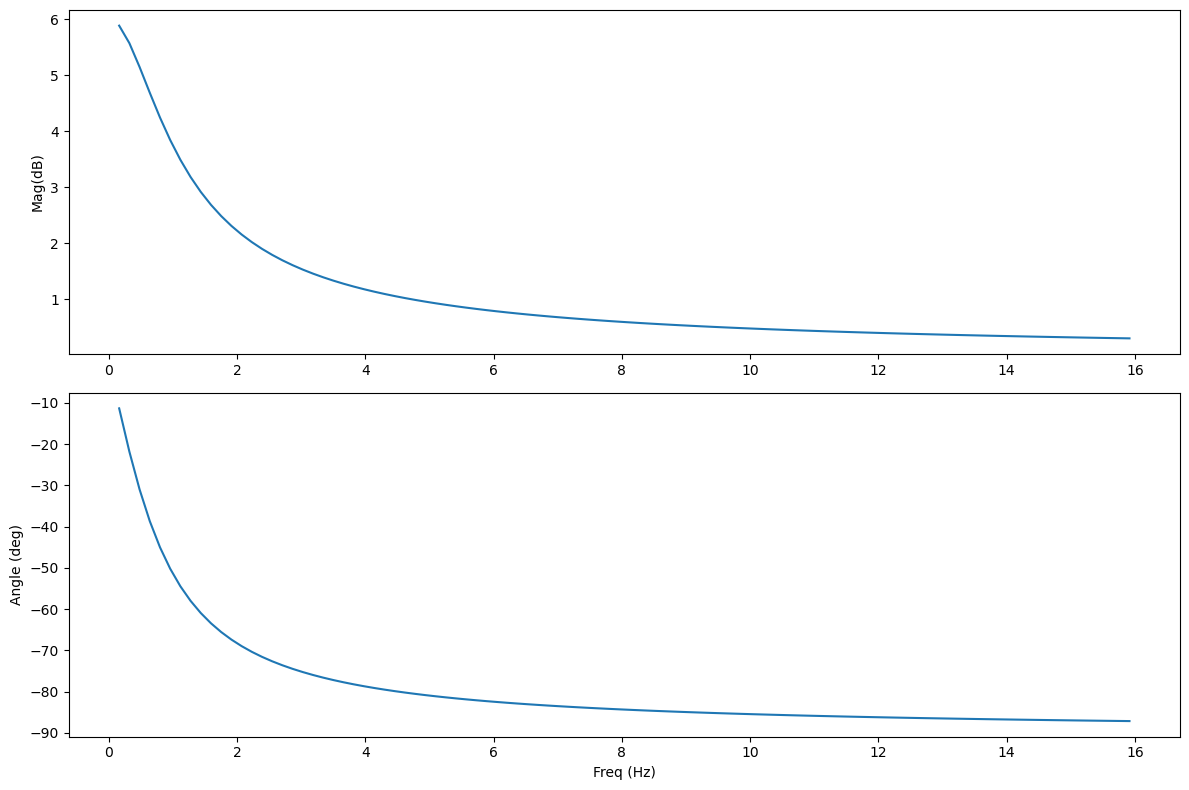

In [16]:
w = np.linspace(1, 100, 100) 
jw = 1j*w
H_jw = 30/(jw + 5)
Mag_array = np.abs(H_jw)
Angle_array = np.angle(H_jw, deg=True)

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(w/2/np.pi, Mag_array)
plt.ylabel("Mag(dB)")

plt.subplot(2, 1, 2)
plt.plot(w/2/np.pi, Angle_array)
plt.xlabel("Freq (Hz)")
plt.ylabel("Angle (deg)")

plt.tight_layout()

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 2: Bode Plot</h2>
</div>

In practice, engineers want to examine how a system affects input across different frequency scales: **All the way from very low freqs toward very high freqs**.

If you check the plots in Task 1,

* Suppose you want to plot a "0.01 Hz" point on it, it will locate very close to previous "1 Hz" point. Hard to see it.
* Suppose you want to plot a "100 Hz" point on it, it will locate far right ourside your screen.

So, linear scale doesn't work well for a broad range . For resolve such isse, people plot $f$ (Hz) in **Logarithmic spacing**:

**Equal distances** on the $f$ (Hz) Axis correspond to freq intervals of **0.1-1, 1–10, 10–100, 100–1000**, and so on. Each of these intervals, where the freq increases by a factor of **10**, is called a **decade**. This logarithmic spacing allows for a more balanced representation of system behavior across a wide range of frequencies.

-------------
Now, we are very close to the concept of **Bode Plot**.

Bode plot is **a set of two plots** that describe how a system affects sine input:
1. **Magnitude Plot**: 
    - **Y-axis**: $20 \log_{10} |H(j\omega)|$

   This is called decibel scale. Unit is **dB**.

   In general, dB unit of ratio, not an absolute unit of measurement. Specifically in bode, dB represent the ratio of the output to the input. 
   
   The reason of why use such odd scale is for **Bode Straight-line Approximations**, which will be introduced after Spring break.
    - **X-axis**: $f$ (Hz) in a **logarithmic spacing**.
3. **Phase Plot**:   
    - **Y-axis**: $\angle (H(j\omega))$, unit is **degree**
    - **X-axis**: $f$ (Hz) in a **logarithmic spacing**. same as Magnitude Plot

-------
Based on the previous descrption, adjust your plot code in Task 1 to be such scale.

Two help functions:

```np.log10(...)```: https://numpy.org/doc/stable/reference/generated/numpy.log10.html

```plt.semilogx(... , ...)```: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.semilogx.html 

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Plot in required scale: 1 pt</strong>
</span>

---------
In Scipy, it provides a function to simplify the plotting procedures.

```scipy.signal.bode``` : https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bode.html 

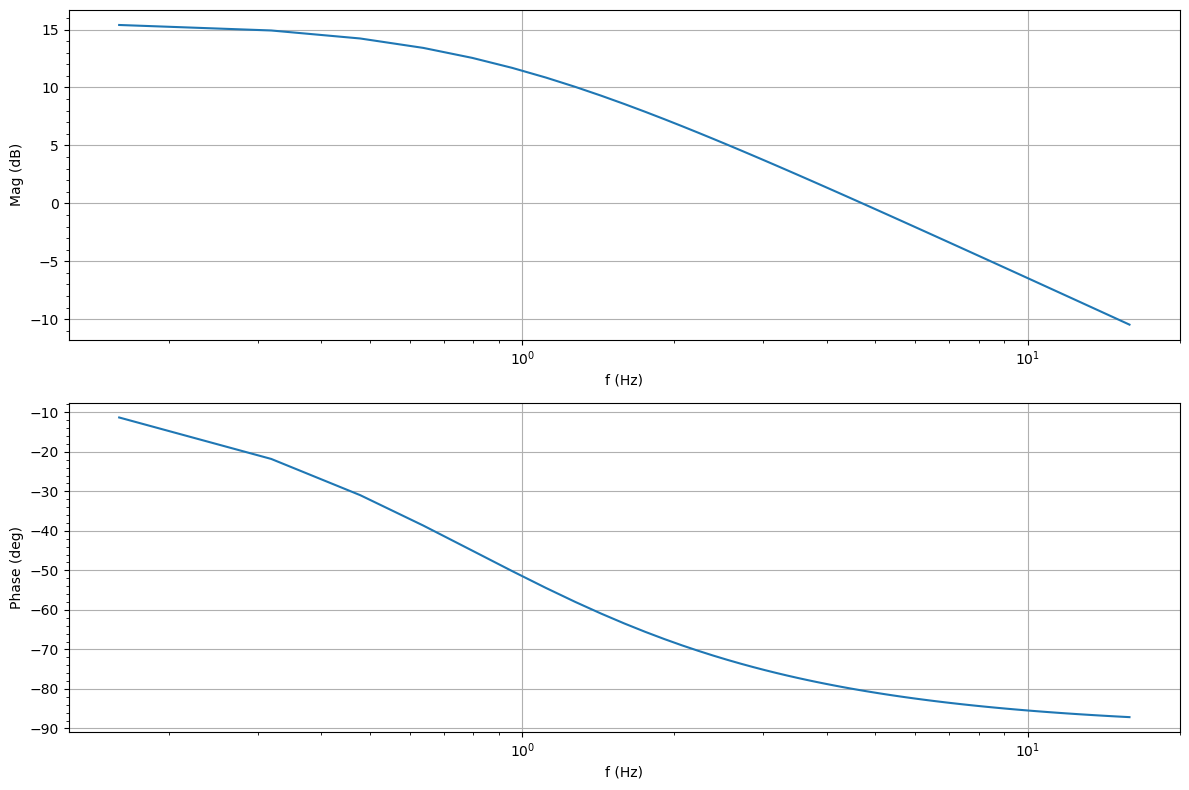

In [17]:
## Run the code 
w_bode = np.linspace(1,100,100)
Hs_bode = sig.lti([30],[1, 5])
_, mag_bode, phase_bode = sig.bode(Hs_bode, w=w_bode )

plt.figure(figsize=(12, 8))
## display the Mag plot
plt.subplot(2, 1, 1)
plt.semilogx(w_bode/2/np.pi, mag_bode)
plt.grid(True)
plt.minorticks_on()
plt.xlabel("f (Hz)")
plt.ylabel("Mag (dB)")

## display the phase plot
plt.subplot(2, 1, 2)
plt.semilogx(w_bode/2/np.pi, phase_bode)
plt.grid(True)
plt.minorticks_on()
plt.xlabel("f (Hz)")
plt.ylabel("Phase (deg)")

plt.tight_layout() 

The core code are a few lines with ```scipy.signal.bode```. 

Most of other code lines are just plotting configuration.

You should see a same graph as your previous one.

----------
In both previous plot, either use your hand-coded one, or use the ```scipy.signal.bode```. Once your look closer,

* Issue 1: the starting part of the curve doesn't look that smooth.

  This is because, we set $\omega_i = 1, 2, 3, 4, \dots, 98, 99, 100$, which results that they are only 10 points in the first decade of the $f$ axis, where 90 points in the first decade of the $f$ axis.
* Issue 2: the curve doesn't display on the entire decade (0.1-1) Hz

  This is because, $\omega_i = 1, 2, 3, 4, \dots, 98, 99, 100$ are in a unit of rad/s, not align with the $f$ (Hz) axis setting.


To deal with 2 issues and get better plotting, we better change to ```np.logspace```

* First define an array: ```f_new_bode = np.logspace(?, ?, 1000)``` (people use Hz in f axis, so better firstly define f. In this way, the whole decade will be shown later in your plot). For example, if you want to display full decade (10-100, 100-1000) Hz, you should set as ```f_new_bode = np.logspace(1, 3, 1000)```
* Then convert to rad/s: ```w_new_bode = np.logspace(?, ?, 1000)``` (bacause ```scipy.signal.bode``` requires w rad/s as an argument, not f Hz)
* Then pass into as ```sig.bode(Hs_bode, w= f_new_bode*2*np.pi) ```

Now, in the next code cell, work on the same problem but plot it better.

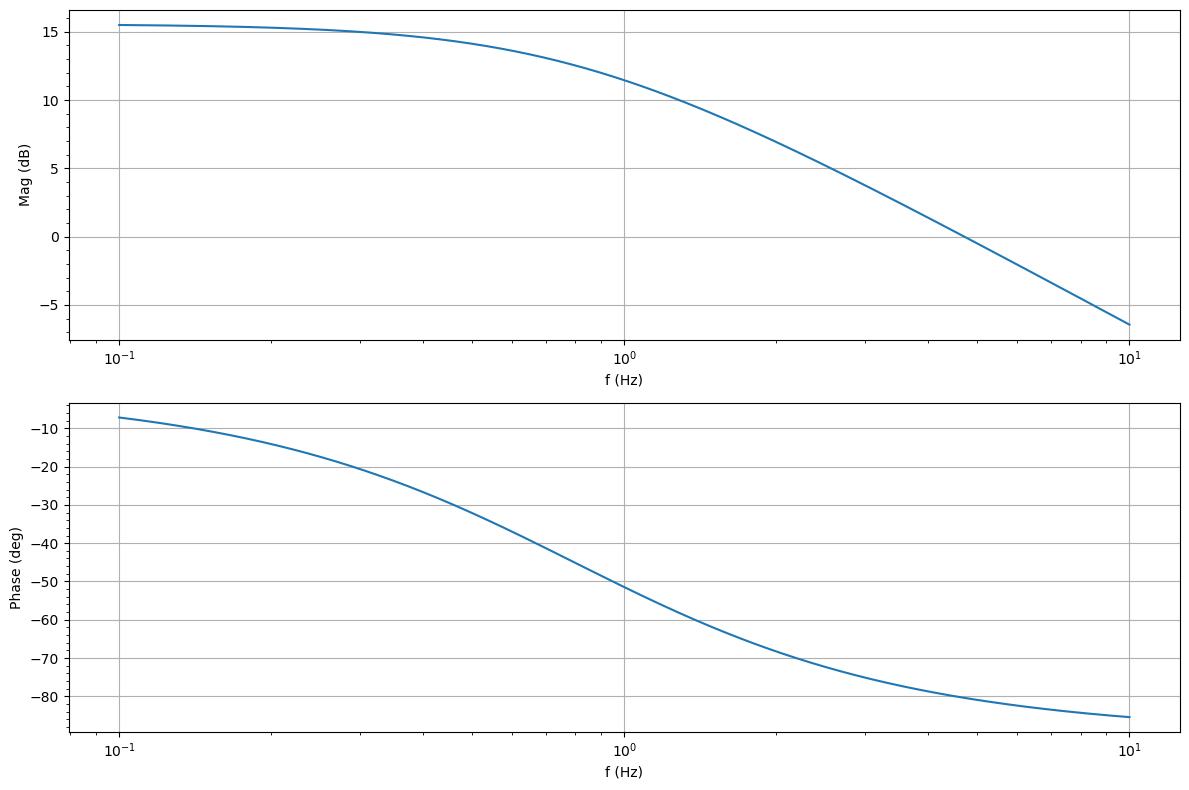

In [20]:
# Follow the previous steps
# Type your code and display a better plot
# You should use the exact functions given, not other ChatGPT pop-up functions.
# Display full decade (0.1-1, 1-10) Hz
f_new_bode = np.logspace(-1,1,1000)
w_new_bode = f_new_bode*2*np.pi
Hs_bode = sig.lti([30],[1, 5])
_, mag_bode, phase_bode = sig.bode(Hs_bode, w=w_new_bode )

plt.figure(figsize=(12, 8))
## display the Mag plot
plt.subplot(2, 1, 1)
plt.semilogx(f_new_bode, mag_bode)
plt.grid(True)
plt.minorticks_on()
plt.xlabel("f (Hz)")
plt.ylabel("Mag (dB)")

## display the phase plot
plt.subplot(2, 1, 2)
plt.semilogx(f_new_bode, phase_bode)
plt.grid(True)
plt.minorticks_on()
plt.xlabel("f (Hz)")
plt.ylabel("Phase (deg)")

plt.tight_layout() 

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Plot using given functions: 1 pt</strong>
</span>

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 3: DC Gain on Bode</h2>
</div>


**DC Gain is one the key properties of the system**. It determines how the system responds to a constant (DC) input. 

In math, DC Gain is:
$$H(0) = \lim_{s \to 0} H(s)$$

Which means you use $\omega = 0$ and plugin $s = j\omega =j0 = 0$.

In addition, DC gain can be negative.

---------

In Bode plot, **absolute value of the DC gain** can be easily identified on the Mag plot:

It appears at **the leftmost value** of the curve and expressed in dB. 

Recall $20 \log_{10} |H(j\omega)|$ is the way you convert normal ratio to dB ratio

--------------
Let's look back the same problem setting in Task 1 and 2.

* From your previous bode, the leftmost value is about ?? dB.

* From your transfer function $H(0) = \lim_{s \to 0} H(s) = \frac{30}{0+5} = ??$

* Compare this two values. Do they match?

**Answer**
* 15.5 dB from the graph
* $H(0) = \lim_{s \to 0} H(s) = \frac{30}{0+5} = 6$

In [21]:
20*np.log10(6)

15.563025007672874

Yes. They match!

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Answer: 1 pt</strong>
</span>

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Submit in .pdf</h2>
</div>


